## KMeans Clustering implementation step by step with Python
This jupyter notebook guides the implementation of KMeans clustering and evaluation of clustering wiht advancend techniques. It works with syntethic  data.


Import the needed modules for all the code in this section:

In [1]:
import matplotlib.pyplot as plt # plotting
from kneed import KneeLocator # knee locator is a library that helps to find the elbow point in the data 
from sklearn.datasets import make_blobs # make_blobs is a library that helps to create a dataset
from sklearn.cluster import KMeans # KMeans is a library that helps to create a KMeans model
from sklearn.metrics import silhouette_score # silhouette_score is a library that helps to calculate the silhouette score
from sklearn.preprocessing import StandardScaler # StandardScaler is a library that helps to scale the data

Generate the synthetic data and labels:

In [2]:
# generate synthetic data
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    # standard deviation of the clusters, it is the spread of the data respect to the mean.
    cluster_std=2.75, 
    random_state=42 
)

Ploting the generated syntethic data

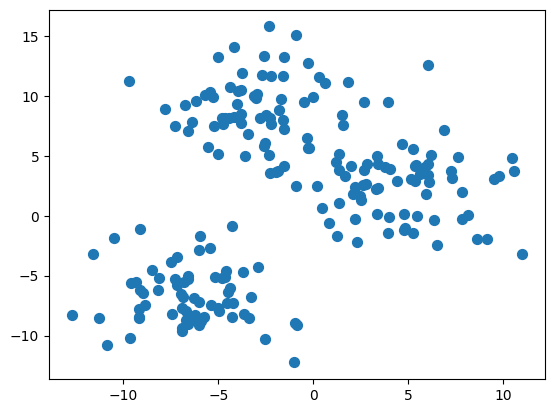

In [3]:
plt.scatter(features[:,0], features[:,1], s=50)
plt.show()

Let's take a look of the first five elements of each variables returned by make_blobs():

In [4]:
features[:5] # display the first 5 rows of the data

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

True labels of the first 5 rows of the labels

In [5]:
true_labels[:5] # display the first 5 rows of the labels

array([1, 0, 2, 2, 2])

Feature scaling: Transform numerical feature to use the same scale. We'll use the standarization type 

In [6]:
scaler = StandardScaler() # create a StandardScaler object 
scaled_features = scaler.fit_transform(features) # scale the features

Let's take a look at first 5 values that has been scaled in scaled_features:

In [7]:
scaled_features[:5] # display the first 5 rows of the scaled data

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

Now the data is ready to be clustered, let's plot the scaled data

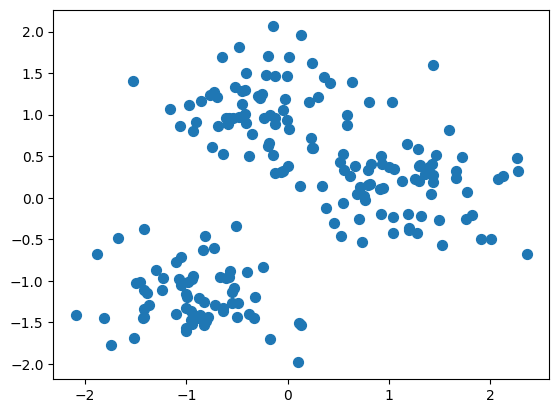

In [8]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], s=50)
plt.show()

Set the KMeans stimator parameters before fitting the stimator to the data:

In [9]:
kmeans = KMeans(
    init="random", # Standard version of KMeans uses k-means++ to choose the initial centroids 
    n_clusters=3, # number of clusters
    n_init=10, # number of times the KMeans algorithm will run with different centroid seeds
    max_iter=300, # maximum number of iterations for each run
    random_state=42 # random seed
)

Fit k-means fit to the data in scaled_features. This will perform 10 runs of K-means algorithm with a max of 300 iterations per run:

In [10]:
kmeans.fit(scaled_features) # fit the KMeans model to the scaled data

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [11]:
# The lowest SSE value
kmeans.inertia_

74.57960106819853

In [12]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

10

Now the cluster assigmentss are stored as a one-dimensional NumPy array in kmeans.labels_. Let's take a look at the first 5 predicted labels

In [14]:
kmeans.labels_[:5] # display the first 5 rows of the labels

array([0, 1, 2, 2, 2], dtype=int32)

Lets plot the K-means clustering with k=3 clusters. Red crosses are centroids of each cluster.

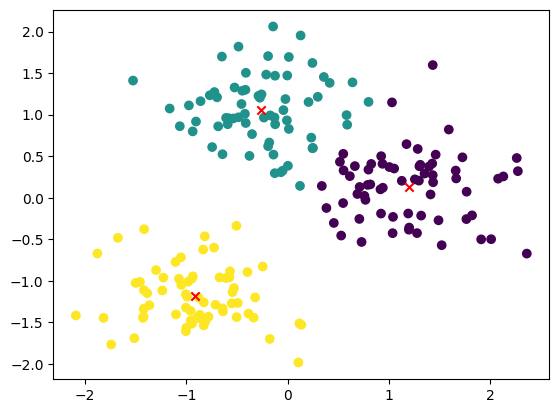

In [15]:
# plot the kmeans clusters
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=kmeans.labels_, cmap=plt.get_cmap('viridis', 3))
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', color='red')
plt.show()

CHOOSING THE APPROPIATE NUMBER OF CLUSTERS
Let's look the two methods commonly used to evaluate the appropiate number of clusters:
* The elbow method
* The silhouette coefficient


### The Elbow Method

In [16]:
# elbow method
kmeans_kwargs = { # create a dictionary with the KMeans parameters
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = [] # create an empty list
for k in range(1, 11): # iterate over the range from 1 to 10
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # create a KMeans model with k clusters, **kmeans_kwargs unpacks the dictionary
    kmeans.fit(scaled_features) # fit the KMeans model to the scaled data
    sse.append(kmeans.inertia_) # append the inertia to the list

Now, Plot SSE vs Number of cluster to find the elbow point (Where the curve starts to bend).

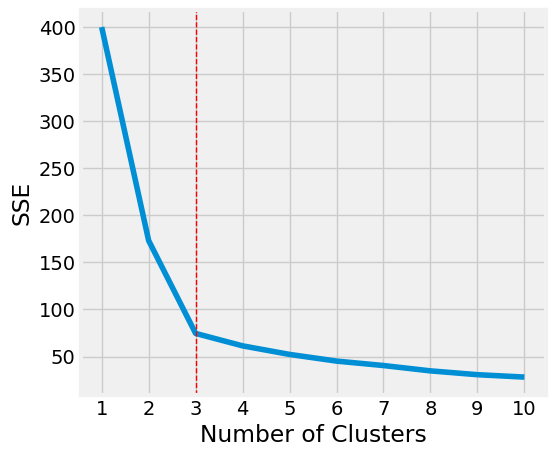

In [17]:
# Plotting the elbow curve
plt.figure(figsize=(6, 5)) # set the figure size
plt.style.use("fivethirtyeight") # set the   style of the plot
plt.plot(range(1, 11), sse) # plot the range from 1 to 10 and the sse
plt.xticks(range(1, 11)) # set the xticks to range from 1 to 10
plt.xlabel("Number of Clusters") # set the x label
plt.ylabel("SSE") # set the y label
# draw a vertical line at the elbow point
plt.axvline(x=3, color='r', linestyle='--', linewidth=1)
plt.show()

Determining the elbow point in the SSE curve isn't always straightforward, so we can find the elbow point programmatically by using the `kneed` package.

In [18]:
# find the elbow point programmatically
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

np.int64(3)

### The silhouette Coefficient
It quantifies how well a data point fits into ist assigned cluster. Its values range betwwen [-1, 1] a score of 1 denotes the best fit and -1 or values near 0 denotes overlaping clusters. 

In [19]:
# List to hold the silhouette coefficients for each k
silhouette_coefficients = [] # create an empty list

# Iterate over a range of 2 to 11
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # create a KMeans model with k clusters, **kmeans_kwargs unpacks the dictionary
    kmeans.fit(scaled_features) # fit the KMeans model to the scaled data
    score = silhouette_score(scaled_features, kmeans.labels_) # calculate the silhouette score
    silhouette_coefficients.append(score) # append the score to the list

Plott the average of silhoutte coefficients for each K 

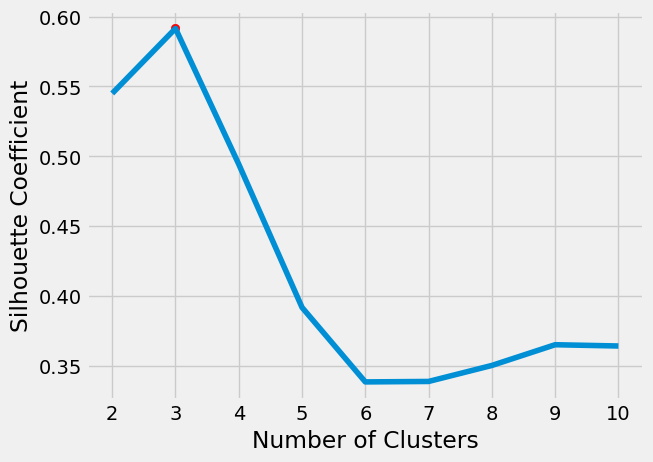

In [20]:
# Plotting the silhouette scores vs the number of clusters
plt.style.use("fivethirtyeight") # set the style of the plot
plt.plot(range(2, 11), silhouette_coefficients) # plot the range from 2 to 11 and the silhouette coefficients   
plt.xticks(range(2, 11)) # set the xticks to range from 2 to 11
plt.xlabel("Number of Clusters") # set the x label
plt.ylabel("Silhouette Coefficient") # set the y label
plt.scatter(3, silhouette_coefficients[1], c='r') # draw a red point at the silhouette coefficient for 3 clusters
plt.show()

Note: The decision about chossing the number of cluester should be guided by a combination of domain knowledge and clustering evaluation metrics

## Advanced Evaluation for clustering
When comparing k-means against [DBSCAN algorithm](https://en.wikipedia.org/wiki/DBSCAN) approach on nonspherical clusters, the methods stduied before(elbow and silhouette) rarelly match human intuition. Therefore, in this scenario advanced clustering evaluation is required.

In [21]:
# import the necessary libraries for DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # make_moons is a library that helps to create a dataset
from sklearn.metrics import adjusted_rand_score # adjusted_rand_score is a library that helps to calculate the adjusted rand score  


By using make_moons() we'll generate synthetic data in the shape of crescents.

In [22]:
# generate synthetic data   
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
) # noise is the standard deviation of the Gaussian noise added to the data


Let's plot the generated data

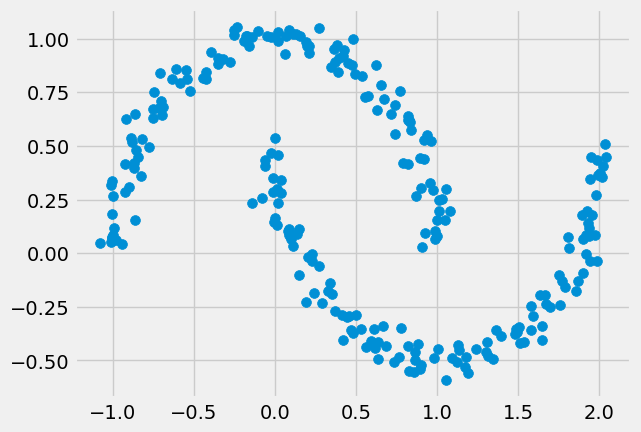

In [23]:
plt.scatter(features[:,0], features[:,1], s=50)
plt.show()

Lets scale the synthetic generated data and take a look o of the first 5 rows of scaled data

In [24]:
# scale the synthetic data
scaled_features = StandardScaler().fit_transform(features) 
# show the first 5 rows of the scaled data
scaled_features[:5]

array([[-0.48023085, -0.28032707],
       [ 0.62771081, -0.19665978],
       [-1.39787132,  0.85683564],
       [-0.50684454,  1.36434089],
       [-1.72904034,  0.17085164]])

Lets plot the scaled data

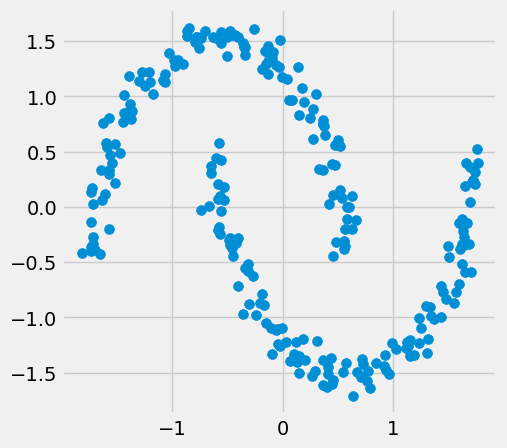

In [25]:
plt.figure(figsize=(5, 5)) 
plt.scatter(scaled_features[:,0], scaled_features[:,1], s=50)

Now Fit K-meanS and DBSCAN clustering algorithm to the scaled data.

In [26]:
# create a DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5) # eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other
dbscan.fit(scaled_features) # fit the DBSCAN model to the scaled data   

# create KMeans model
kmeans = KMeans(n_clusters=2, random_state=42) # create a KMeans model with 2 clusters  
kmeans.fit(scaled_features) # fit the KMeans model to the scaled data   

# Calculate the silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round(2)

# Calculate the silhouette score for KMeans
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

Print and compare the silhouette coefficient for each of the two algorithms.

In [27]:
# print the silhouette scores formating foe better readability
print(f"DBSCAN silhouette score: {dbscan_silhouette}")
print(f"KMeans silhouette score: {kmeans_silhouette}")

DBSCAN silhouette score: 0.38
KMeans silhouette score: 0.5


Silhouettee coeficient for KMeans is higher suggesting a better cluster which is misleading in this scnerario.

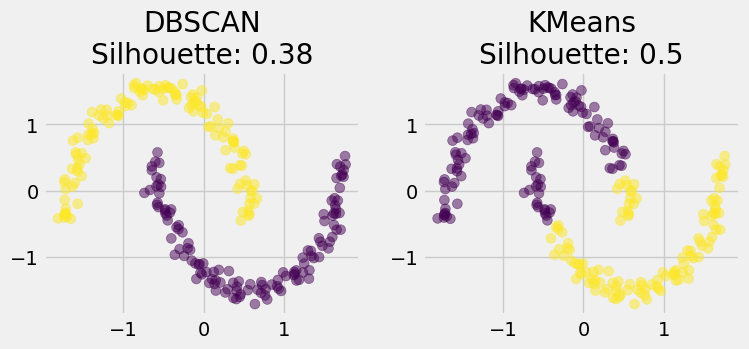

In [28]:
# plot the DBSCAN clusters and the KMeans clusters
plt.figure(figsize=(8, 3)) 
plt.subplot(121) # create a subplot with 1 row and 2 columns and select the first subplot
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan.labels_, cmap="viridis", s=50, alpha=0.5) 
plt.title(f"DBSCAN\nSilhouette: {dbscan_silhouette}") 
plt.subplot(122)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap="viridis", s=50, alpha=0.5)
plt.title(f"KMeans\nSilhouette: {kmeans_silhouette}")
plt.show()

Since the ground truth labels are known, it's possible to use a clustering metric to compare the clustering results with the true labels.
The [scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score) of a common metric called [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index) might be used to measure the similarity between true and predicted labels.

In [29]:
# ari for DBSCAN
dbscan_ari = adjusted_rand_score(true_labels, dbscan.labels_)
# ari for KMeans
kmeans_ari = adjusted_rand_score(true_labels, kmeans.labels_)
# print the adjusted rand scores
print(f"DBSCAN ARI: {dbscan_ari:.2f}")
print(f"KMeans ARI: {kmeans_ari:.2f}")

DBSCAN ARI: 1.00
KMeans ARI: 0.47


The ARI varies between [0, 1] where 0 indicates not agreement between two clusters and 1 indicates that the clusterings are exaclty the same. 
Then we can conclude that DBSCAB is the best algorithm in this scenario and the silhouette coefficient was misleading.

### Credits
This notebook was created by [Inti Toalombo](https://github.com/IntiToalombo)

References: 
- [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)